In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('C:/Users/DeLL/OneDrive/ML Datasets/AirPassengers.csv', index_col = 'Month' )
data.head(10)

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
1949-06,135
1949-07,148
1949-08,148
1949-09,136


In [7]:
#converting into time series data

dateparse = lambda dates : pd.datetime.strptime(dates, '%Y-%m')
parse_data = pd.read_csv('C:/Users/DeLL/OneDrive/ML Datasets/AirPassengers.csv', parse_dates = ['Month'], index_col = 'Month',
                        date_parser = dateparse)

In [8]:
parse_data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [9]:
#since only one column is there we can convert this to pandas series and use

ts = parse_data['#Passengers']
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [12]:
#Extract the data using series -

ts['1949-01-01']

112

In [13]:
from datetime import datetime 

In [14]:
ts[datetime(1949,1,1)]

112

In [15]:
#extract range of data
ts['1949-01-01':'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [18]:
ts[:'1949-06-01']  #last entry also included

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
Name: #Passengers, dtype: int64

In [20]:
#extract data for the entire year
ts['1949']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

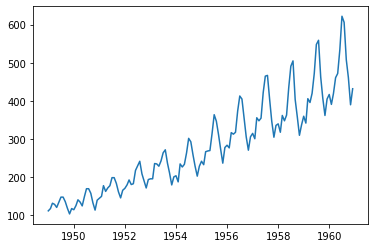

In [33]:
plt.plot(ts)

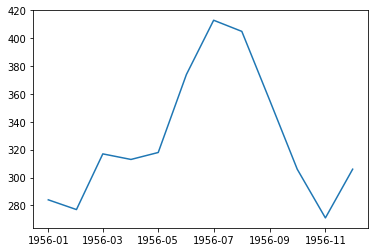

In [40]:
plt.plot(ts['1956'])

In [41]:
from statsmodels.tsa.stattools import adfuller  #augmented Dickey-Fuller test

In [42]:
# Computing 3 month moving average

ts.rolling(3).mean().head()

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01    120.666667
1949-04-01    126.333333
1949-05-01    127.333333
Name: #Passengers, dtype: float64

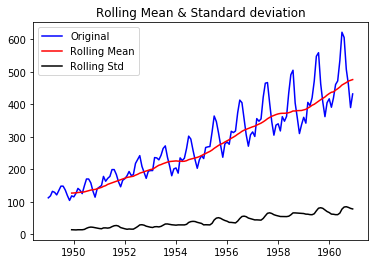

Results of Dickey-Fuller test: 
Test statistic                0.815369
p-value                       0.991880
#Lags Used                   13.000000
No. of observations used    130.000000
Critical value (1%)          -3.481682
Critical value (5%)          -2.884042
Critical value (10%)         -2.578770
dtype: float64


In [49]:
def test_stationarity(timeseries):
    
    #Determining rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test
    print('Results of Dickey-Fuller test: ')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4],
                        index = ['Test statistic', 'p-value','#Lags Used', 'No. of observations used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)' %key] = value
    print(dfoutput)
test_stationarity(ts)

## Estimating and Eliminating Trend

### Method 1: Transformation

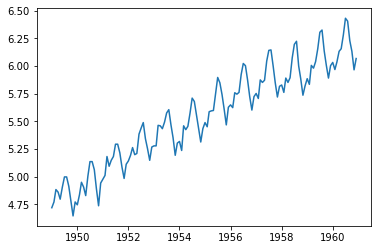

In [53]:
ts_log = np.log(ts)
plt.plot(ts_log)

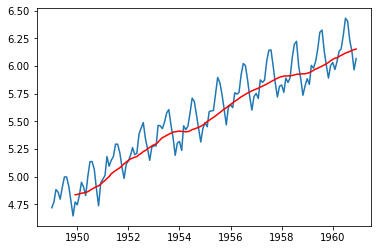

In [54]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color = 'red')

In [55]:
#Subtract rollinfg mean from original data
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(15)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
Name: #Passengers, dtype: float64

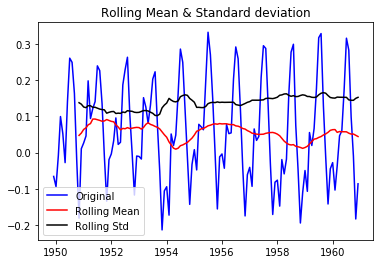

Results of Dickey-Fuller test: 
Test statistic               -3.162908
p-value                       0.022235
#Lags Used                   13.000000
No. of observations used    119.000000
Critical value (1%)          -3.486535
Critical value (5%)          -2.886151
Critical value (10%)         -2.579896
dtype: float64


In [56]:
'''
As we took lag as 12 for first 11 values , moving average is not defined.
So drop NaN and check the plots to test stationarity.
'''

ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

here the test t-statistic is smaller than  this data is 5% critical value. So with  95% confidence we can say that the data is stationary. to improve we can use exponential weighted average

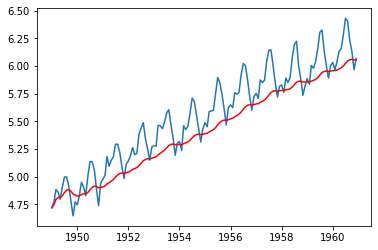

In [57]:
# ewm() is the function used to find exponential weighted movng average
# the parameter halflife is used to define the amount of exponential decay.

expweighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expweighted_avg, color = 'red')

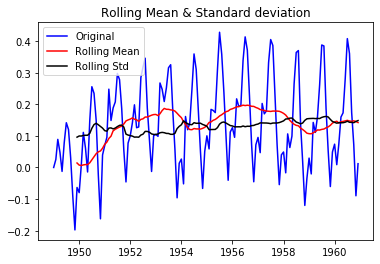

Results of Dickey-Fuller test: 
Test statistic               -3.601262
p-value                       0.005737
#Lags Used                   13.000000
No. of observations used    130.000000
Critical value (1%)          -3.481682
Critical value (5%)          -2.884042
Critical value (10%)         -2.578770
dtype: float64


In [58]:
# subtract rolling mean from original data

ts_log_ewma_diff = ts_log - expweighted_avg
test_stationarity(ts_log_ewma_diff)